In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import sys
import numpy as np
import seaborn as sns
import scipy.optimize as op
from scipy.signal import argrelmax
from scipy.signal import argrelmin
from scipy.optimize import curve_fit
from scipy.fftpack import fft as fft
sns.set_palette("PuBuGn_d",15)
sns.set_style("whitegrid")
import emcee


#this notebook was made by Ellie

In [32]:
#importing data of a 135 GHz souce

cfile = open('/Users/elerath/Downloads/software/data/raw_data/20171013_1858_135GHz_beam_33.pkl', 'rb')
d = pickle.load(cfile)
cfile.close()

print d.keys()

['wlf0R', 'wlf0F', 'oversample', 'ADC gain', 'scan time', 'iterations', 'scan start struct_time', 'speed', 'acceleration', 'max_d', 'max_nu', 'run', 'delay0F', 'dx', 'delay0R', 'sample freq', 'sig0R', 'scan0F', 'acc time', 'samples requested', 'sig0F', 'scan0R']


128.0
10


(3.5, 5.5)

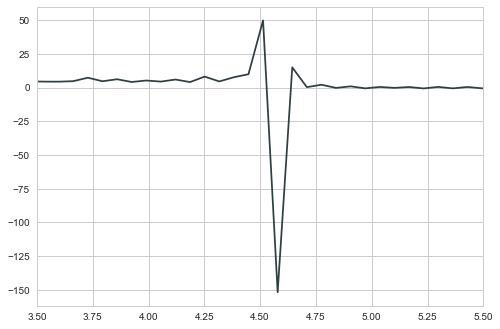

In [35]:
#perform fft on the data and plot it

#we will perform our analysis on the sig0F scan 
#i'm not sure if this is right but this is how its gonna go down

signal = list(d['sig0F'])
fft_of_signal = fft(signal)

#plot the signal and the fourier transform of the signal using pl.plot

n = len(signal)
dx = d['dx']
dt =  1 / (d['sample freq'])
t = n * dt

print d['sample freq']

df = (1/(t))
time = np.arange(n) * dt
freq = np.arange(n) * df
print d['speed']

#pl.plot(time, signal, "b.")
#pl.xlim([2, 2.5])
pl.plot(freq, fft_of_signal)
pl.xlim([0, n*df / 2])
pl.xlim([3.5, 5.5])

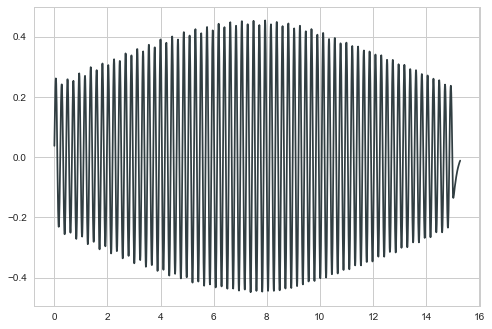

In [34]:
pl.plot(time, signal)

In [25]:
f_rf = 1.35 * 10**11
c = 3 * 10**11
f_ifg = f_rf * d['speed'] / c

print f_ifg

4.5
